In [1]:
import numpy as np
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import librosa.display
from tensorflow.keras import layers, models



In [2]:
clean_dir = r'C:\Users\Siddhartha Devan V\Downloads\Fellowship\complete_dataset\Clean\spectrogram'
noise_dir = r'C:\Users\Siddhartha Devan V\Downloads\Fellowship\complete_dataset\Noise\spectrogram'

clean_spect_paths = os.listdir(clean_dir)
noise_spect_paths = os.listdir(noise_dir)

for i, j in zip(clean_spect_paths, noise_spect_paths):
    print(i,j)
    if i != j:
        print('not equal')

100_0.npy 100_0.npy
100_1.npy 100_1.npy
100_2.npy 100_2.npy
100_3.npy 100_3.npy
101_0.npy 101_0.npy
101_1.npy 101_1.npy
101_2.npy 101_2.npy
101_3.npy 101_3.npy
101_4.npy 101_4.npy
102_0.npy 102_0.npy
102_1.npy 102_1.npy
102_2.npy 102_2.npy
102_3.npy 102_3.npy
103_0.npy 103_0.npy
103_1.npy 103_1.npy
103_2.npy 103_2.npy
103_3.npy 103_3.npy
104_0.npy 104_0.npy
104_1.npy 104_1.npy
104_2.npy 104_2.npy
104_3.npy 104_3.npy
11_0.npy 11_0.npy
11_1.npy 11_1.npy
12_0.npy 12_0.npy
12_1.npy 12_1.npy
13_0.npy 13_0.npy
13_1.npy 13_1.npy
14_0.npy 14_0.npy
14_1.npy 14_1.npy
15_0.npy 15_0.npy
15_1.npy 15_1.npy
16_0.npy 16_0.npy
16_1.npy 16_1.npy
17_0.npy 17_0.npy
17_1.npy 17_1.npy
17_2.npy 17_2.npy
18_0.npy 18_0.npy
18_1.npy 18_1.npy
18_2.npy 18_2.npy
18_3.npy 18_3.npy
18_4.npy 18_4.npy
19_0.npy 19_0.npy
19_1.npy 19_1.npy
19_2.npy 19_2.npy
19_3.npy 19_3.npy
19_4.npy 19_4.npy
1_0.npy 1_0.npy
1_1.npy 1_1.npy
1_2.npy 1_2.npy
1_3.npy 1_3.npy
1_4.npy 1_4.npy
201_0.npy 201_0.npy
202_0.npy 202_0.npy
203_0.npy 

In [3]:
clean_spect_paths = [os.path.join(clean_dir, i) for i in clean_spect_paths]
noise_spect_paths = [os.path.join(noise_dir, i) for i in noise_spect_paths]

print(clean_spect_paths[:5])
print()
print(noise_spect_paths[:5])

['C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_0.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_1.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_2.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\100_3.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Clean\\spectrogram\\101_0.npy']

['C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_0.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_1.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_2.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowship\\complete_dataset\\Noise\\spectrogram\\100_3.npy', 'C:\\Users\\Siddhartha Devan V\\Downloads\\Fellowshi

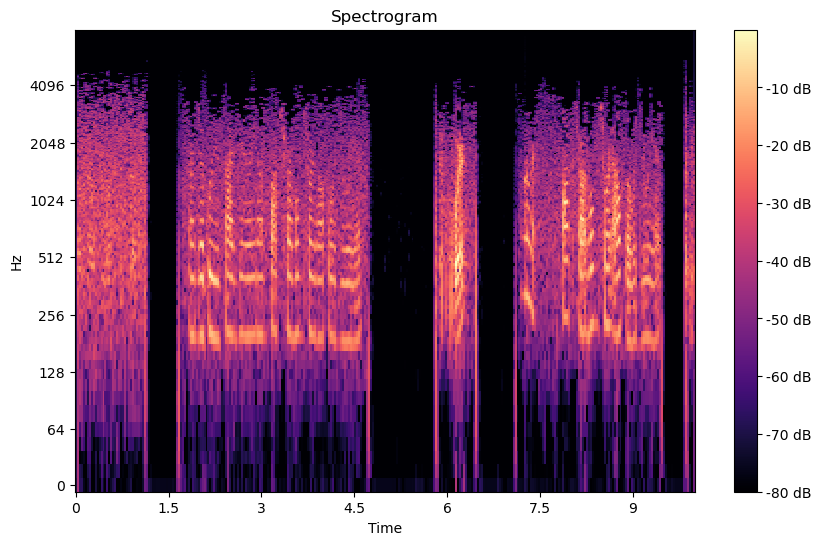

In [4]:
def plot_spectrogram(spectrogram, sr=16000, hop_length=512, title="Spectrogram"):
    """
    Visualizes a spectrogram using librosa and matplotlib.
    """
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                             sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()
plot_spectrogram(np.load(clean_spect_paths[0]))

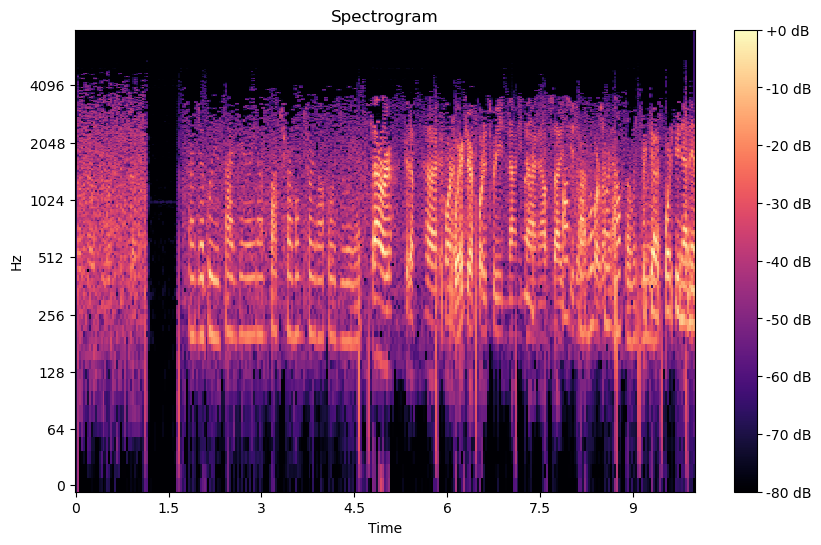

In [5]:
plot_spectrogram(np.load(noise_spect_paths[0]))

In [6]:
np.load(noise_spect_paths[0]).dtype

dtype('float32')

In [6]:
from sklearn.model_selection import train_test_split
train_noisy, test_noisy, train_clean, test_clean = train_test_split(noise_spect_paths, clean_spect_paths, test_size=0.2, random_state=42)


In [7]:
train_data = tf.data.Dataset.from_tensor_slices((train_noisy, train_clean))
test_data = tf.data.Dataset.from_tensor_slices((test_noisy, test_clean))



In [8]:
print(train_data)

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>


In [9]:
def loader_func(noise_path, clean_path):
    noise = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x).astype(np.float16), axis = -1), [noise_path], tf.float16))
    clean = tf.convert_to_tensor(tf.numpy_function(lambda x: np.expand_dims(np.load(x).astype(np.float16), axis = -1), [clean_path], tf.float16))
    
    noise = tf.reshape(noise, (313, 513))
    clean = tf.reshape(clean, (313, 513))
    return noise, clean



train_data = train_data.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.map(loader_func, num_parallel_calls=tf.data.AUTOTUNE)


batch_size = 2 # Choose an appropriate batch size for your model

# Batch the dataset
train_data = train_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Batch the dataset
test_data = test_data.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [10]:
for x, y in train_data.take(2):
    print(x.shape)

(2, 313, 513)
(2, 313, 513)


In [11]:
def snr_loss(y_true, y_pred):

    signal_power = tf.reduce_sum(tf.square(y_true), axis=[1, 2])

    noise_power = tf.reduce_sum(tf.square(y_true - y_pred), axis=[1, 2])
    snr = 10.0 * tf.math.log((signal_power + 1e-8) / (noise_power + 1e-8)) / tf.math.log(10.0)

    mean_snr = tf.reduce_mean(snr)

    return -mean_snr

In [12]:
def build_lstm_denoising_autoencoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder (LSTM)
    x = layers.LSTM(256, return_sequences=True)(inputs)  # Output: (313, 256)
    x = layers.LSTM(128, return_sequences=True)(x)       # Output: (313, 128)
    x = layers.LSTM(64, return_sequences=False)(x)       # Output: (64)  # Bottleneck
    
    # Decoder (LSTM)
    x = layers.RepeatVector(input_shape[0])(x)           # Output: (313, 64)
    
    x = layers.LSTM(64, return_sequences=True)(x)        # Output: (313, 64)
    x = layers.LSTM(128, return_sequences=True)(x)       # Output: (313, 128)
    x = layers.LSTM(256, return_sequences=True)(x)       # Output: (313, 256)
    
    # Final output layer
    outputs = layers.TimeDistributed(layers.Dense(input_shape[1], activation='sigmoid'))(x)  # Output: (313, 513)

    # Create the model
    autoencoder = models.Model(inputs, outputs)
    return autoencoder

# Build the model
lstm_autoencoder = build_lstm_denoising_autoencoder((313,513))


In [13]:
lstm_autoencoder.compile(optimizer='adam', loss=snr_loss, metrics=['mae', 'mse'])

# Summary of the model
lstm_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 313, 513)]        0         
                                                                 
 lstm (LSTM)                 (None, 313, 256)          788480    
                                                                 
 lstm_1 (LSTM)               (None, 313, 128)          197120    
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector (RepeatVector  (None, 313, 64)          0         
 )                                                               
                                                                 
 lstm_3 (LSTM)               (None, 313, 64)           33024     
                                                             

In [14]:
# Train the model
history = lstm_autoencoder.fit(train_data, epochs=15)


Epoch 1/15
124/124 [==============================] - 108s 793ms/step - loss: 6.4966 - mae: 0.7469 - mse: 6.0472
Epoch 2/15
124/124 [==============================] - 60s 483ms/step - loss: 0.3331 - mae: 0.6863 - mse: 6.0392
Epoch 3/15
124/124 [==============================] - 74s 596ms/step - loss: 0.0105 - mae: 0.6639 - mse: 6.0408
Epoch 4/15
124/124 [==============================] - 25s 190ms/step - loss: -0.0062 - mae: 0.6464 - mse: 6.0447
Epoch 5/15
124/124 [==============================] - 23s 183ms/step - loss: -0.0206 - mae: 0.6283 - mse: 6.0503
Epoch 6/15
124/124 [==============================] - 23s 183ms/step - loss: -0.0311 - mae: 0.6126 - mse: 6.0567
Epoch 7/15
124/124 [==============================] - 15s 123ms/step - loss: -0.0391 - mae: 0.5993 - mse: 6.0630
Epoch 8/15
124/124 [==============================] - 15s 119ms/step - loss: -0.0588 - mae: 0.5858 - mse: 6.0541
Epoch 9/15
124/124 [==============================] - 23s 184ms/step - loss: -0.0137 - mae: 0.4552

Text(0.5, 1.0, 'loss')

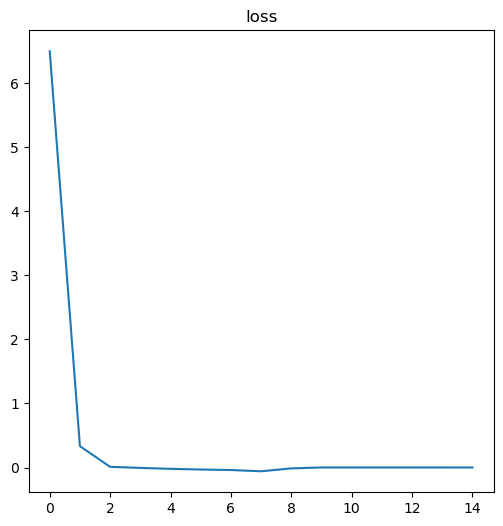

In [15]:
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'])
plt.title('loss')

Text(0.5, 1.0, 'mae')

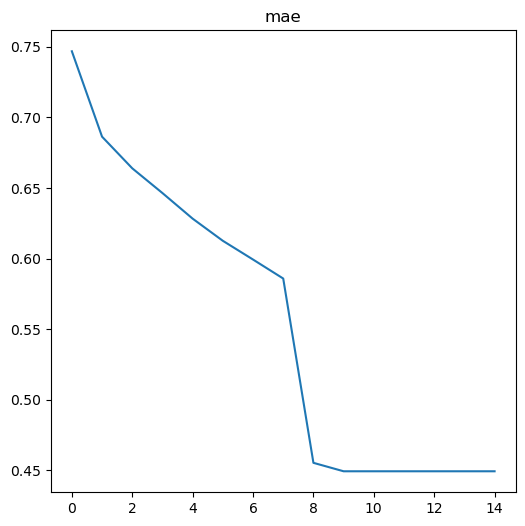

In [16]:
plt.figure(figsize=(6,6))
plt.plot(history.history['mae'])
plt.title('mae')

Text(0.5, 1.0, 'mse')

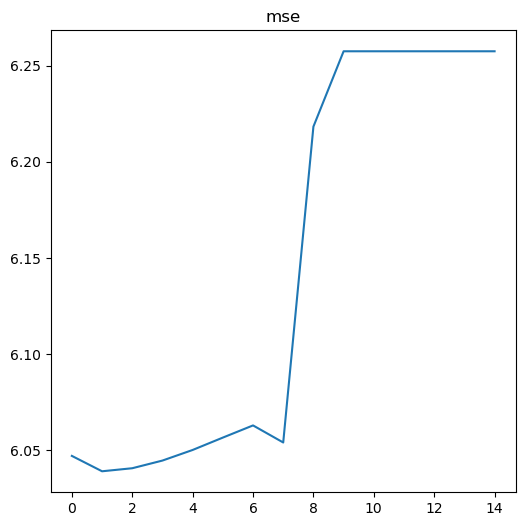

In [17]:
plt.figure(figsize=(6,6))
plt.plot(history.history['mse'])
plt.title('mse')


In [18]:
lstm_autoencoder.evaluate(test_data)

31/31 [==============================] - 4s 62ms/step - loss: 2.6038e-04 - mae: 0.4282 - mse: 6.8132


[0.000260375119978562, 0.4282131493091583, 6.813242435455322]

In [25]:
denoised_output = lstm_autoencoder.predict(test_data)

31/31 [==============================] - 21s 565ms/step


In [19]:
lstm_autoencoder.save("Lstm_300_2")

INFO:tensorflow:Assets written to: Lstm_300_2\assets


INFO:tensorflow:Assets written to: Lstm_300_2\assets
